In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [3]:
# clone darknet repo
%cd /content/gdrive/MyDrive/yolov3
!git clone https://github.com/AlexeyAB/darknet

/content/gdrive/MyDrive/yolov3
Cloning into 'darknet'...
remote: Enumerating objects: 15514, done.
remote: Total 15514 (delta 0), reused 0 (delta 0), pack-reused 15514
Receiving objects: 100% (15514/15514), 14.16 MiB | 13.47 MiB/s, done.
Resolving deltas: 100% (10413/10413), done.
Updating files: 100% (2058/2058), done.


In [8]:
# change makefile to have GPU and OPENCV enabled
%cd /content/gdrive/MyDrive/yolov3/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/gdrive/MyDrive/yolov3/darknet


In [9]:
# verifying CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [10]:
# make darknet 
%cd /content/gdrive/MyDrive/yolov3/darknet
!make

/content/gdrive/MyDrive/yolov3/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (iteration_old == 0)


In [7]:
!wget https://pjreddie.com/media/files/yolov3.weights
!cp /content/gdrive/MyDrive/yolov3/yolov3.weights


--2023-04-27 16:16:07--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  58.4MB/s    in 4.1s    

2023-04-27 16:16:11 (58.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

cp: missing destination file operand after '/content/gdrive/MyDrive/yolov3/yolov3.weights'
Try 'cp --help' for more information.


In [11]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:

!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

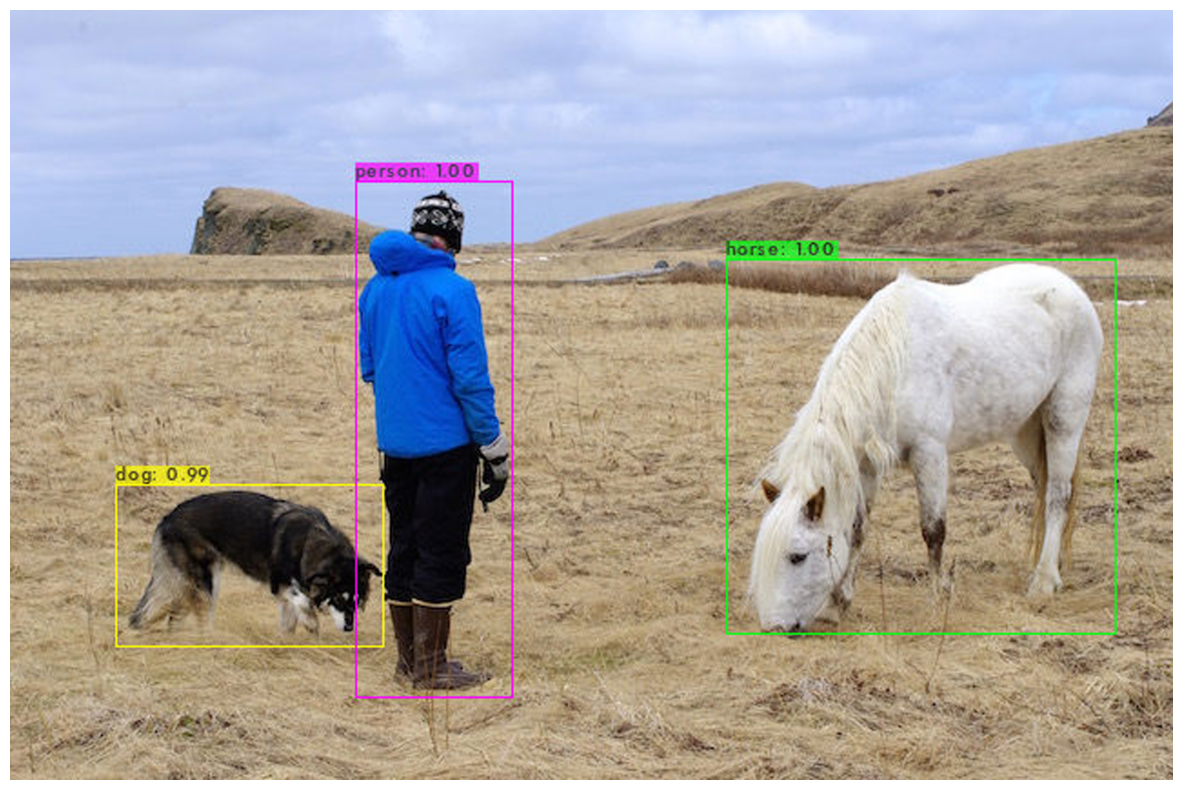

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

In [ ]:
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/gdrive/MyDrive/yolov3/test/Street_Crossing.jpg
imShow('predictions.jpg')

Output hidden; open in https://colab.research.google.com to view.

[Errno 20] Not a directory: 'darknet'
/content/darknet
 CUDA-version: 11080 (12000), cuDNN: 8.7.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64

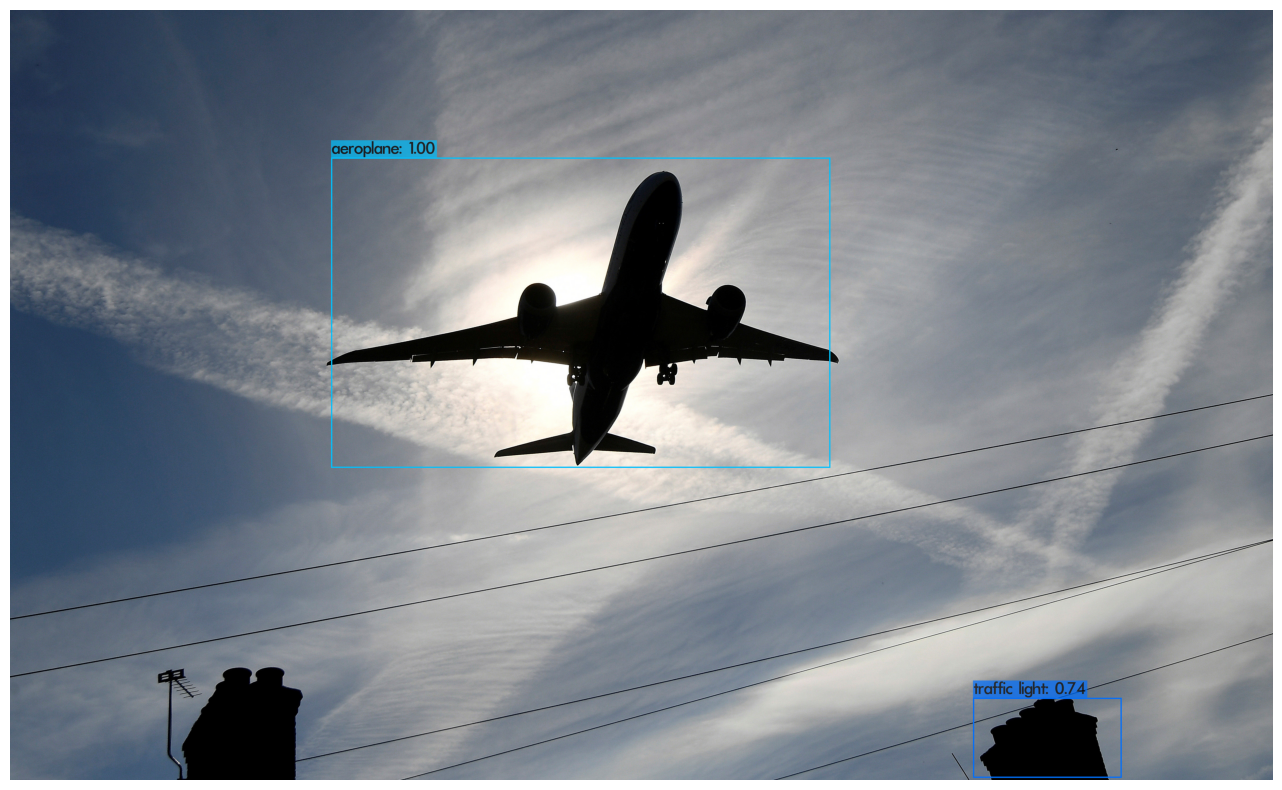

In [ ]:
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/gdrive/MyDrive/yolov3/test/Plane-Testing.jpeg
imShow('predictions.jpg')

In [10]:
!ls

3rdparty		darknet_video.py       README.md
backup			data		       results
build			image_yolov3.sh        scripts
build.ps1		image_yolov4.sh        src
cfg			include		       vcpkg.json
cmake			json_mjpeg_streams.sh  vcpkg.json.opencv23
CMakeLists.txt		LICENSE		       video_yolov3.sh
darknet			Makefile	       video_yolov4.sh
DarknetConfig.cmake.in	net_cam_v3.sh	       yolov3.weights
darknet_images.py	net_cam_v4.sh
darknet.py		obj


In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights
!cp /mydrive/yolov3/yolov3.weights ./

--2023-04-23 08:45:39--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  18.6MB/s    in 14s     

2023-04-23 08:45:54 (17.0 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

cp: cannot stat '/mydrive/yolov3/yolov3.weights': No such file or directory


In [ ]:
!ls /mydrive/yolov3

test


In [ ]:
!cp /mydrive/obj(2).zip

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `cp /mydrive/obj(2).zip'


In [ ]:
%cd darknet

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [ ]:
%cd /content/darknet
!unzip ./objj.zip -d data/
!rm ./objj.zip

/content/darknet
unzip:  cannot find or open ./objj.zip, ./objj.zip.zip or ./objj.zip.ZIP.
rm: cannot remove './objj.zip': No such file or directory


In [ ]:
!unzip /content/gdrive/MyDrive/yolov3/objj.zip -d /content/gdrive/MyDrive/yolov3/darknet/data


Archive:  /content/gdrive/MyDrive/yolov3/objj.zip
   creating: /content/gdrive/MyDrive/yolov3/darknet/data/obj/csv_folder/
  inflating: /content/gdrive/MyDrive/yolov3/darknet/data/obj/csv_folder/class-descriptions-boxable.csv  
  inflating: /content/gdrive/MyDrive/yolov3/darknet/data/obj/csv_folder/train-annotations-bbox.csv  
   creating: /content/gdrive/MyDrive/yolov3/darknet/data/obj/Dataset/
   creating: /content/gdrive/MyDrive/yolov3/darknet/data/obj/Dataset/train/
   creating: /content/gdrive/MyDrive/yolov3/darknet/data/obj/Dataset/train/Handgun/
  inflating: /content/gdrive/MyDrive/yolov3/darknet/data/obj/Dataset/train/Handgun/0045a7e07dd4fa0e.jpg  
  inflating: /content/gdrive/MyDrive/yolov3/darknet/data/obj/Dataset/train/Handgun/0045a7e07dd4fa0e.txt  
  inflating: /content/gdrive/MyDrive/yolov3/darknet/data/obj/Dataset/train/Handgun/004eb6ca27183afe.jpg  
  inflating: /content/gdrive/MyDrive/yolov3/darknet/data/obj/Dataset/train/Handgun/004eb6ca27183afe.txt  
  inflating: /con

In [12]:
%cd /content/gdrive/MyDrive/yolov3/darknet
!python generate_train.py

/content/gdrive/MyDrive/yolov3/darknet


In [3]:
%cd /content/gdrive/MyDrive/yolov3/darknet

/content/gdrive/MyDrive/yolov3/darknet


In [ ]:
%cd /content/gdrive/MyDrive/yolov3/darknet
!./darknet detector train /content/gdrive/MyDrive/yolov3/darknet/data/obj.data /content/gdrive/MyDrive/yolov3/darknet/cfg/yolov3-custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 238453, rewritten_bbox = 4.162665 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.870690), count: 5, class_loss = 0.000011, iou_loss = 0.076197, total_loss = 0.076208 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 238458, rewritten_bbox = 4.162578 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.851666), count: 3, class_loss = 0.008642, iou_loss = 0.095380, total_loss = 0.104022 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.846727), count: 2, class_loss = 0.094314, iou_loss = 0.034485, total_loss = 0.128799 
v3 (ms